In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv("data/aug_train.csv")

In [3]:
df.head()

enrollee_id      city  city_development_index gender  \
0         8949  city_103                   0.920   Male   
1        29725   city_40                   0.776   Male   
2        11561   city_21                   0.624    NaN   
3        33241  city_115                   0.789    NaN   
4          666  city_162                   0.767   Male   

       relevent_experience enrolled_university education_level  \
0  Has relevent experience       no_enrollment        Graduate   
1   No relevent experience       no_enrollment        Graduate   
2   No relevent experience    Full time course        Graduate   
3   No relevent experience                 NaN        Graduate   
4  Has relevent experience       no_enrollment         Masters   

  major_discipline experience company_size    company_type last_new_job  \
0             STEM        >20          NaN             NaN            1   
1             STEM         15        50-99         Pvt Ltd           >4   
2             STEM          5          NaN             NaN        never   
3  Business Degree         <1          NaN         Pvt Ltd        never   
4             STEM        >20        50-99  Funded Startup            4   

   training_hours  target  
0              36     1.0  
1              47     0.0  
2              83     0.0  
3              52     1.0  
4               8     0.0

In [4]:
"There are {}, or {}%, people looking for a new job, while {}, or {}% are not. In total participans {}.".format(df[df["target"]==1].count()[0], round((df[df["target"]==1].count()[0]/df.shape[0])*100,2), df[df["target"]==0].count()[0], round((df[df["target"]==0].count()[0]/df.shape[0])*100,2), df["enrollee_id"].unique().shape[0])

'There are 4777, or 24.93%, people looking for a new job, while 14381, or 75.07% are not. In total participans 19158.'

In [5]:
df["target_new"] = df["target"]
df['target_new'] = df['target_new'].replace(1,"looking")
df['target_new'] = df['target_new'].replace(0,"not_looking")

In [6]:
df = df.fillna("unkown")

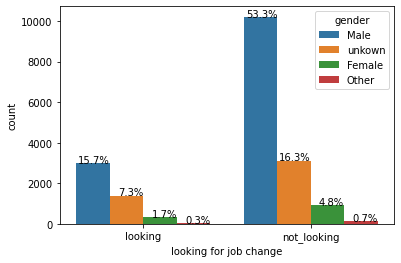

In [9]:
ax = sns.countplot(x="target_new",data=df, hue="gender")
total =float(len(df))

plt.xlabel("looking for job change")

for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width()
    y = p.get_height()
    ax.annotate(percentage, (x, y),ha='right')
plt.savefig('blog/gender_overview.png')
plt.show()

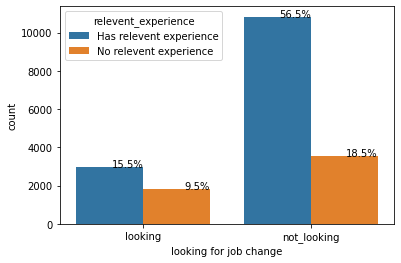

In [10]:
ax = sns.countplot(x="target_new",data=df, hue="relevent_experience")
total =float(len(df))

plt.xlabel("looking for job change")

for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width()
    y = p.get_height()
    ax.annotate(percentage, (x, y),ha='right')
plt.savefig("blog/relevant_experience.png")
plt.show()

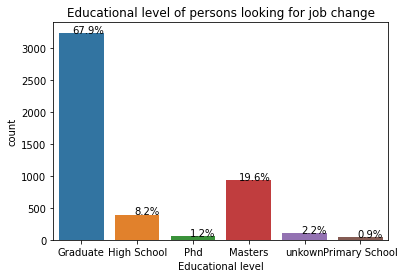

In [11]:
ax = sns.countplot(x="education_level",data=df[df['target']==1])
total_1 =float(len(df[df['target']==1]))
plt.title("Educational level of persons looking for job change")
plt.xlabel("Educational level")

for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total_1)
    x = p.get_x() + p.get_width()
    y = p.get_height()
    ax.annotate(percentage, (x, y),ha='right')
plt.savefig("blog/education_target1.png")
plt.show()

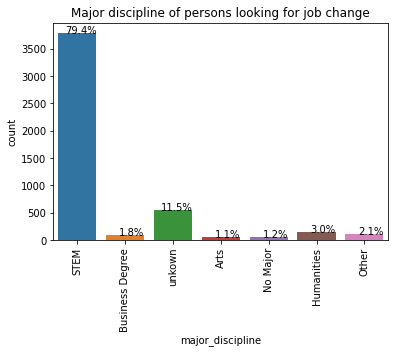

In [12]:
ax = sns.countplot(x="major_discipline",data=df[df['target']==1])
total_1 =float(len(df[df['target']==1]))
plt.title("Major discipline of persons looking for job change")

for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total_1)
    x = p.get_x() + p.get_width()
    y = p.get_height()
    ax.annotate(percentage, (x, y),ha='right')
plt.xticks(rotation=90)
plt.savefig("blog/major_discipline_target1.png")
plt.show()

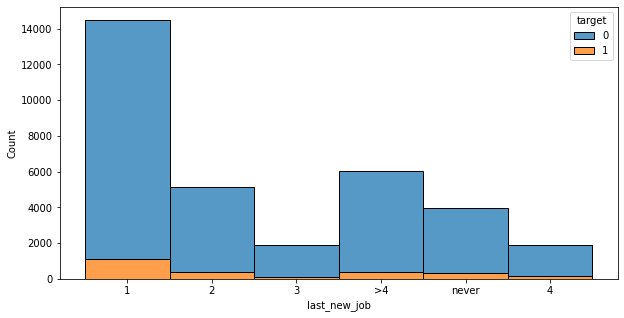

In [89]:
figures, axes = plt.subplots(figsize=(10, 5))
sns.histplot(df, x="last_new_job", hue="target", multiple="stack");

In [60]:
groupby_exp = df.groupby(["relevent_experience","experience"]).count()["enrollee_id"]
experience_frame = pd.DataFrame(groupby_exp)
experience_frame.columns = ["count"]
experience_frame["%"] = round((experience_frame["count"] / df.shape[0])*100,1)
experience_frame

count     %
relevent_experience     experience             
Has relevent experience 0             225   0.7
                        1             271   0.8
                        2             684   2.0
                        3            1044   3.1
                        4            1286   3.9
                        5            1572   4.7
                        6            1486   4.5
                        7            1344   4.0
                        8            1136   3.4
                        9            1386   4.2
                        10           1459   4.4
                        11           1019   3.1
                        12            811   2.4
                        13            676   2.0
                        14            939   2.8
                        15           1087   3.3
                        16            862   2.6
                        17            604   1.8
                        18            475   1.4
                        19            514   1.5
                        20            286   0.9
                        21           5532  16.6
No relevent experience  0             557   1.7
                        1             547   1.6
                        2            1072   3.2
                        3            1122   3.4
                        4             954   2.9
                        5             828   2.5
                        6             553   1.7
                        7             435   1.3
                        8             287   0.9
                        9             336   1.0
                        10            294   0.9
                        11            171   0.5
                        12             94   0.3
                        13             87   0.3
                        14            141   0.4
                        15            157   0.5
                        16            102   0.3
                        17             55   0.2
                        18             58   0.2
                        19             76   0.2
                        20             35   0.1
                        21            721   2.2

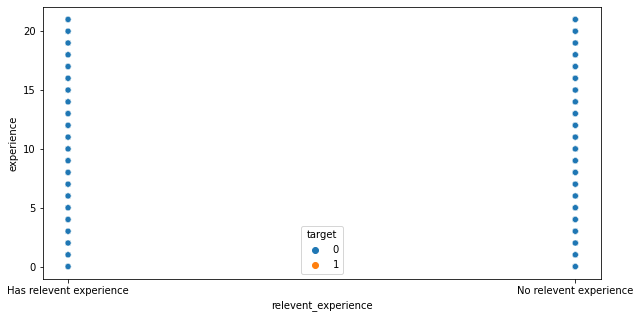

In [16]:
figures, axes = plt.subplots(figsize=(10, 5))
sns.scatterplot("relevent_experience", "experience", data=df, hue="target", hue_order=[0,1], ax=axes);

In [48]:
plt.figure(figsize=(9, 5))
plot_bar_graph('experience', order=order)
plt.show()

NameError: name 'plot_bar_graph' is not defined